<a href="https://colab.research.google.com/github/kluless13/paper/blob/main/yolo_nas_COTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Sep 17 13:01:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Installing YOLO-NAS

In [2]:
!pip install super_gradients
!pip install roboflow
!pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 52.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 110.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 112.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 94.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 9.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.5
    Uninstalling pyparsing-2.4.5:
      Successfully uninstalled pyparsing-2.4.5
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled 

In [2]:
import torch

DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
%cd {HOME}

from roboflow import Roboflow
# Roboflow API

/content
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Google-Images-2 in yolov5pytorch:: 100%|██████████| 6714/6714 [00:00<00:00, 8993.21it/s] 


In [5]:
LOCATION = dataset.location
print("location:", LOCATION)
CLASSES = sorted(project.classes.keys())
print("classes:", CLASSES)

location: /content/Google-Images-2
classes: ['COTs']


### Fine Tuning

In [7]:
MODEL_ARCH = 'yolo_nas_l'
BATCH_SIZE = 8
MAX_EPOCHS = 25
CHECKPOINT_DIR = f'{HOME}/checkpoints'
EXPERIMENT_NAME = project.name.lower().replace(" ", "_")

In [8]:
from super_gradients.training import Trainer

trainer = Trainer(experiment_name=EXPERIMENT_NAME, ckpt_root_dir=CHECKPOINT_DIR)

[2023-09-17 13:03:20] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-09-17 13:03:20] WARNING - __init__.py - Failed to import pytorch_quantization


The console stream is logged into /root/sg_logs/console.log


[2023-09-17 13:03:25] INFO - utils.py - NumExpr defaulting to 8 threads.
Setuptools is replacing distutils.
[2023-09-17 13:03:27] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-09-17 13:03:27] WARNING - export.py - Failed to import pytorch_quantization
[2023-09-17 13:03:27] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [9]:
dataset_params = {
    'data_dir': LOCATION,
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': CLASSES
}

In [10]:
from super_gradients.training.dataloaders.dataloaders import (
    coco_detection_yolo_format_train, coco_detection_yolo_format_val)

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

[2023-09-17 13:04:05] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 3072/3072 [00:00<00:00, 6368.69it/s]
[2023-09-17 13:04:05] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 227/227 [00:00<00:00, 6481.77it/s]
[2023-09-17 13:04:05] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 52/52 [00:00<00:00, 5023.81it/s]


In [11]:
train_data.dataset.transforms # Inspecting dataset

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': (640, 640), 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': (640, 640), 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': (640, 640), 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5),
 DetectionPaddedRescale('additional_samples_count': 0, 'non_em

### Instantiate the model

In [12]:
from super_gradients.training import models

model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    pretrained_weights="coco"
)

[2023-09-17 13:04:18] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth
100%|██████████| 256M/256M [00:03<00:00, 72.5MB/s]
[2023-09-17 13:04:23] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


#### Defining the metrics and training parameters

In [13]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": MAX_EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [ ]:
!tensorboard dev upload \
  --logdir {CHECKPOINT_DIR}/{EXPERIMENT_NAME} \
  --name "yolo NAS LF" \
  --description "yolo NAS metrics" \
  --one_shot

### Training the model

In [14]:
trainer.train(
    model=model,
    training_params=train_params,
    train_loader=train_data,
    valid_loader=val_data
)

The console stream is now moved to /content/checkpoints/google_images/console_Sep17_13_04_56.txt


[2023-09-17 13:04:57] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
[2023-09-17 13:04:58] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Dataset size:                 1812       (len(train_set))
    - Batch size per GPU:           8          (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             8          (num_gpus * batch_size)
    - Effective Batch size:         8          (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         226        (len(train_loader))
    - Gradient updates per epoch:   226        (len(train_loader) / batch_accumulate)

[2023-09-17 13:04:58] INFO - sg_trainer.py - Started training for 25 epochs (0/24)

Validating: 100%|██████████| 14/14 [00:05<00:00,  2.70it/s]
[2023-09-17 13:07:21] INFO - base_sg_logger.py 

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 2.0147
│   ├── Ppyoloeloss/loss_iou = 0.2984
│   ├── Ppyoloeloss/loss_dfl = 1.8893
│   └── Ppyoloeloss/loss = 3.7054
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.9097
    ├── Ppyoloeloss/loss_iou = 0.2806
    ├── Ppyoloeloss/loss_dfl = 2.0696
    ├── Ppyoloeloss/loss = 3.6462
    ├── Precision@0.50 = 0.0
    ├── Recall@0.50 = 0.0
    ├── Map@0.50 = 0.0152
    └── F1@0.50 = 0.0



Validating epoch 1: 100%|██████████| 14/14 [00:05<00:00,  2.62it/s]
[2023-09-17 13:09:41] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/google_images/ckpt_best.pth
[2023-09-17 13:09:41] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5026726126670837


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2969
│   │   ├── Epoch N-1      = 2.0147 (↘ -0.7178)
│   │   └── Best until now = 2.0147 (↘ -0.7178)
│   ├── Ppyoloeloss/loss_iou = 0.2697
│   │   ├── Epoch N-1      = 0.2984 (↘ -0.0288)
│   │   └── Best until now = 0.2984 (↘ -0.0288)
│   ├── Ppyoloeloss/loss_dfl = 1.7501
│   │   ├── Epoch N-1      = 1.8893 (↘ -0.1392)
│   │   └── Best until now = 1.8893 (↘ -0.1392)
│   └── Ppyoloeloss/loss = 2.8462
│       ├── Epoch N-1      = 3.7054 (↘ -0.8593)
│       └── Best until now = 3.7054 (↘ -0.8593)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3319
    │   ├── Epoch N-1      = 1.9097 (↘ -0.5778)
    │   └── Best until now = 1.9097 (↘ -0.5778)
    ├── Ppyoloeloss/loss_iou = 0.2211
    │   ├── Epoch N-1      = 0.2806 (↘ -0.0596)
    │   └── Best until now = 0.2806 (↘ -0.0596)
    ├── Ppyoloeloss/loss_dfl = 1.7218
    │   ├── Epoch N-1      = 2.0696 (↘ -0.3478)
    │   └── Best until now = 2.0696 (↘ -0.3478)
    ├── Ppyoloeloss/lo

Validating epoch 2: 100%|██████████| 14/14 [00:05<00:00,  2.61it/s]
[2023-09-17 13:12:04] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/google_images/ckpt_best.pth
[2023-09-17 13:12:04] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6515843868255615


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2447
│   │   ├── Epoch N-1      = 1.2969 (↘ -0.0522)
│   │   └── Best until now = 1.2969 (↘ -0.0522)
│   ├── Ppyoloeloss/loss_iou = 0.2586
│   │   ├── Epoch N-1      = 0.2697 (↘ -0.0111)
│   │   └── Best until now = 0.2697 (↘ -0.0111)
│   ├── Ppyoloeloss/loss_dfl = 1.6973
│   │   ├── Epoch N-1      = 1.7501 (↘ -0.0529)
│   │   └── Best until now = 1.7501 (↘ -0.0529)
│   └── Ppyoloeloss/loss = 2.7399
│       ├── Epoch N-1      = 2.8462 (↘ -0.1063)
│       └── Best until now = 2.8462 (↘ -0.1063)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.228
    │   ├── Epoch N-1      = 1.3319 (↘ -0.1039)
    │   └── Best until now = 1.3319 (↘ -0.1039)
    ├── Ppyoloeloss/loss_iou = 0.2137
    │   ├── Epoch N-1      = 0.2211 (↘ -0.0074)
    │   └── Best until now = 0.2211 (↘ -0.0074)
    ├── Ppyoloeloss/loss_dfl = 1.615
    │   ├── Epoch N-1      = 1.7218 (↘ -0.1068)
    │   └── Best until now = 1.7218 (↘ -0.1068)
    ├── Ppyoloeloss/loss

Validating epoch 3: 100%|██████████| 14/14 [00:05<00:00,  2.60it/s]


SUMMARY OF EPOCH 3
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2378
│   │   ├── Epoch N-1      = 1.2447 (↘ -0.0069)
│   │   └── Best until now = 1.2447 (↘ -0.0069)
│   ├── Ppyoloeloss/loss_iou = 0.2508
│   │   ├── Epoch N-1      = 0.2586 (↘ -0.0078)
│   │   └── Best until now = 0.2586 (↘ -0.0078)
│   ├── Ppyoloeloss/loss_dfl = 1.6702
│   │   ├── Epoch N-1      = 1.6973 (↘ -0.027)
│   │   └── Best until now = 1.6973 (↘ -0.027)
│   └── Ppyoloeloss/loss = 2.7
│       ├── Epoch N-1      = 2.7399 (↘ -0.0399)
│       └── Best until now = 2.7399 (↘ -0.0399)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.385
    │   ├── Epoch N-1      = 1.228  (↗ 0.157)
    │   └── Best until now = 1.228  (↗ 0.157)
    ├── Ppyoloeloss/loss_iou = 0.2135
    │   ├── Epoch N-1      = 0.2137 (↘ -0.0002)
    │   └── Best until now = 0.2137 (↘ -0.0002)
    ├── Ppyoloeloss/loss_dfl = 1.6337
    │   ├── Epoch N-1      = 1.615  (↗ 0.0187)
    │   └── Best until now = 1.615  (↗ 0.0187)
    ├── Ppyoloeloss/loss = 2.7356


Validating epoch 4: 100%|██████████| 14/14 [00:05<00:00,  2.61it/s]
[2023-09-17 13:16:51] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/google_images/ckpt_best.pth
[2023-09-17 13:16:51] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7098568677902222


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2118
│   │   ├── Epoch N-1      = 1.2378 (↘ -0.026)
│   │   └── Best until now = 1.2378 (↘ -0.026)
│   ├── Ppyoloeloss/loss_iou = 0.2447
│   │   ├── Epoch N-1      = 0.2508 (↘ -0.0061)
│   │   └── Best until now = 0.2508 (↘ -0.0061)
│   ├── Ppyoloeloss/loss_dfl = 1.6518
│   │   ├── Epoch N-1      = 1.6702 (↘ -0.0185)
│   │   └── Best until now = 1.6702 (↘ -0.0185)
│   └── Ppyoloeloss/loss = 2.6495
│       ├── Epoch N-1      = 2.7    (↘ -0.0505)
│       └── Best until now = 2.7    (↘ -0.0505)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2056
    │   ├── Epoch N-1      = 1.385  (↘ -0.1794)
    │   └── Best until now = 1.228  (↘ -0.0224)
    ├── Ppyoloeloss/loss_iou = 0.2066
    │   ├── Epoch N-1      = 0.2135 (↘ -0.0069)
    │   └── Best until now = 0.2135 (↘ -0.0069)
    ├── Ppyoloeloss/loss_dfl = 1.5775
    │   ├── Epoch N-1      = 1.6337 (↘ -0.0562)
    │   └── Best until now = 1.615  (↘ -0.0375)
    ├── Ppyoloeloss/loss

Validating epoch 5: 100%|██████████| 14/14 [00:05<00:00,  2.60it/s]


SUMMARY OF EPOCH 5
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1881
│   │   ├── Epoch N-1      = 1.2118 (↘ -0.0237)
│   │   └── Best until now = 1.2118 (↘ -0.0237)
│   ├── Ppyoloeloss/loss_iou = 0.2333
│   │   ├── Epoch N-1      = 0.2447 (↘ -0.0115)
│   │   └── Best until now = 0.2447 (↘ -0.0115)
│   ├── Ppyoloeloss/loss_dfl = 1.5883
│   │   ├── Epoch N-1      = 1.6518 (↘ -0.0635)
│   │   └── Best until now = 1.6518 (↘ -0.0635)
│   └── Ppyoloeloss/loss = 2.5654
│       ├── Epoch N-1      = 2.6495 (↘ -0.0841)
│       └── Best until now = 2.6495 (↘ -0.0841)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2979
    │   ├── Epoch N-1      = 1.2056 (↗ 0.0923)
    │   └── Best until now = 1.2056 (↗ 0.0923)
    ├── Ppyoloeloss/loss_iou = 0.2288
    │   ├── Epoch N-1      = 0.2066 (↗ 0.0222)
    │   └── Best until now = 0.2066 (↗ 0.0222)
    ├── Ppyoloeloss/loss_dfl = 1.7387
    │   ├── Epoch N-1      = 1.5775 (↗ 0.1612)
    │   └── Best until now = 1.5775 (↗ 0.1612)
    ├── Ppyoloeloss/loss = 2

Validating epoch 6: 100%|██████████| 14/14 [00:05<00:00,  2.60it/s]


SUMMARY OF EPOCH 6
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1688
│   │   ├── Epoch N-1      = 1.1881 (↘ -0.0193)
│   │   └── Best until now = 1.1881 (↘ -0.0193)
│   ├── Ppyoloeloss/loss_iou = 0.2315
│   │   ├── Epoch N-1      = 0.2333 (↘ -0.0017)
│   │   └── Best until now = 0.2333 (↘ -0.0017)
│   ├── Ppyoloeloss/loss_dfl = 1.5755
│   │   ├── Epoch N-1      = 1.5883 (↘ -0.0128)
│   │   └── Best until now = 1.5883 (↘ -0.0128)
│   └── Ppyoloeloss/loss = 2.5354
│       ├── Epoch N-1      = 2.5654 (↘ -0.0301)
│       └── Best until now = 2.5654 (↘ -0.0301)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.292
    │   ├── Epoch N-1      = 1.2979 (↘ -0.006)
    │   └── Best until now = 1.2056 (↗ 0.0863)
    ├── Ppyoloeloss/loss_iou = 0.2159
    │   ├── Epoch N-1      = 0.2288 (↘ -0.0129)
    │   └── Best until now = 0.2066 (↗ 0.0093)
    ├── Ppyoloeloss/loss_dfl = 1.6591
    │   ├── Epoch N-1      = 1.7387 (↘ -0.0797)
    │   └── Best until now = 1.5775 (↗ 0.0816)
    ├── Ppyoloeloss/loss = 

Validating epoch 7: 100%|██████████| 14/14 [00:05<00:00,  2.57it/s]
[2023-09-17 13:24:09] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/google_images/ckpt_best.pth
[2023-09-17 13:24:09] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7110527157783508


SUMMARY OF EPOCH 7
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1562
│   │   ├── Epoch N-1      = 1.1688 (↘ -0.0126)
│   │   └── Best until now = 1.1688 (↘ -0.0126)
│   ├── Ppyoloeloss/loss_iou = 0.2287
│   │   ├── Epoch N-1      = 0.2315 (↘ -0.0028)
│   │   └── Best until now = 0.2315 (↘ -0.0028)
│   ├── Ppyoloeloss/loss_dfl = 1.5702
│   │   ├── Epoch N-1      = 1.5755 (↘ -0.0053)
│   │   └── Best until now = 1.5755 (↘ -0.0053)
│   └── Ppyoloeloss/loss = 2.513
│       ├── Epoch N-1      = 2.5354 (↘ -0.0224)
│       └── Best until now = 2.5354 (↘ -0.0224)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1206
    │   ├── Epoch N-1      = 1.292  (↘ -0.1713)
    │   └── Best until now = 1.2056 (↘ -0.085)
    ├── Ppyoloeloss/loss_iou = 0.2157
    │   ├── Epoch N-1      = 0.2159 (↘ -0.0003)
    │   └── Best until now = 0.2066 (↗ 0.0091)
    ├── Ppyoloeloss/loss_dfl = 1.6414
    │   ├── Epoch N-1      = 1.6591 (↘ -0.0177)
    │   └── Best until now = 1.5775 (↗ 0.0638)
    ├── Ppyoloeloss/loss =

Validating epoch 8: 100%|██████████| 14/14 [00:05<00:00,  2.58it/s]
[2023-09-17 13:26:39] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/google_images/ckpt_best.pth
[2023-09-17 13:26:39] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8159358501434326


SUMMARY OF EPOCH 8
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.127
│   │   ├── Epoch N-1      = 1.1562 (↘ -0.0292)
│   │   └── Best until now = 1.1562 (↘ -0.0292)
│   ├── Ppyoloeloss/loss_iou = 0.2255
│   │   ├── Epoch N-1      = 0.2287 (↘ -0.0032)
│   │   └── Best until now = 0.2287 (↘ -0.0032)
│   ├── Ppyoloeloss/loss_dfl = 1.5366
│   │   ├── Epoch N-1      = 1.5702 (↘ -0.0336)
│   │   └── Best until now = 1.5702 (↘ -0.0336)
│   └── Ppyoloeloss/loss = 2.4589
│       ├── Epoch N-1      = 2.513  (↘ -0.0541)
│       └── Best until now = 2.513  (↘ -0.0541)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0213
    │   ├── Epoch N-1      = 1.1206 (↘ -0.0993)
    │   └── Best until now = 1.1206 (↘ -0.0993)
    ├── Ppyoloeloss/loss_iou = 0.2079
    │   ├── Epoch N-1      = 0.2157 (↘ -0.0078)
    │   └── Best until now = 0.2066 (↗ 0.0013)
    ├── Ppyoloeloss/loss_dfl = 1.5781
    │   ├── Epoch N-1      = 1.6414 (↘ -0.0633)
    │   └── Best until now = 1.5775 (↗ 0.0006)
    ├── Ppyoloeloss/loss 

Validating epoch 9: 100%|██████████| 14/14 [00:05<00:00,  2.57it/s]


SUMMARY OF EPOCH 9
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1206
│   │   ├── Epoch N-1      = 1.127  (↘ -0.0064)
│   │   └── Best until now = 1.127  (↘ -0.0064)
│   ├── Ppyoloeloss/loss_iou = 0.2239
│   │   ├── Epoch N-1      = 0.2255 (↘ -0.0015)
│   │   └── Best until now = 0.2255 (↘ -0.0015)
│   ├── Ppyoloeloss/loss_dfl = 1.5219
│   │   ├── Epoch N-1      = 1.5366 (↘ -0.0147)
│   │   └── Best until now = 1.5366 (↘ -0.0147)
│   └── Ppyoloeloss/loss = 2.4414
│       ├── Epoch N-1      = 2.4589 (↘ -0.0176)
│       └── Best until now = 2.4589 (↘ -0.0176)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0549
    │   ├── Epoch N-1      = 1.0213 (↗ 0.0336)
    │   └── Best until now = 1.0213 (↗ 0.0336)
    ├── Ppyoloeloss/loss_iou = 0.2104
    │   ├── Epoch N-1      = 0.2079 (↗ 0.0025)
    │   └── Best until now = 0.2066 (↗ 0.0038)
    ├── Ppyoloeloss/loss_dfl = 1.5625
    │   ├── Epoch N-1      = 1.5781 (↘ -0.0156)
    │   └── Best until now = 1.5775 (↘ -0.015)
    ├── Ppyoloeloss/loss = 

Validating epoch 10: 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]


SUMMARY OF EPOCH 10
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.121
│   │   ├── Epoch N-1      = 1.1206 (↗ 0.0004)
│   │   └── Best until now = 1.1206 (↗ 0.0004)
│   ├── Ppyoloeloss/loss_iou = 0.2207
│   │   ├── Epoch N-1      = 0.2239 (↘ -0.0032)
│   │   └── Best until now = 0.2239 (↘ -0.0032)
│   ├── Ppyoloeloss/loss_dfl = 1.512
│   │   ├── Epoch N-1      = 1.5219 (↘ -0.0099)
│   │   └── Best until now = 1.5219 (↘ -0.0099)
│   └── Ppyoloeloss/loss = 2.4289
│       ├── Epoch N-1      = 2.4414 (↘ -0.0125)
│       └── Best until now = 2.4414 (↘ -0.0125)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0135
    │   ├── Epoch N-1      = 1.0549 (↘ -0.0414)
    │   └── Best until now = 1.0213 (↘ -0.0078)
    ├── Ppyoloeloss/loss_iou = 0.215
    │   ├── Epoch N-1      = 0.2104 (↗ 0.0046)
    │   └── Best until now = 0.2066 (↗ 0.0085)
    ├── Ppyoloeloss/loss_dfl = 1.5805
    │   ├── Epoch N-1      = 1.5625 (↗ 0.018)
    │   └── Best until now = 1.5625 (↗ 0.018)
    ├── Ppyoloeloss/loss = 2.341

Validating epoch 11: 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]


SUMMARY OF EPOCH 11
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1041
│   │   ├── Epoch N-1      = 1.121  (↘ -0.0169)
│   │   └── Best until now = 1.1206 (↘ -0.0165)
│   ├── Ppyoloeloss/loss_iou = 0.2167
│   │   ├── Epoch N-1      = 0.2207 (↘ -0.004)
│   │   └── Best until now = 0.2207 (↘ -0.004)
│   ├── Ppyoloeloss/loss_dfl = 1.4875
│   │   ├── Epoch N-1      = 1.512  (↘ -0.0245)
│   │   └── Best until now = 1.512  (↘ -0.0245)
│   └── Ppyoloeloss/loss = 2.3897
│       ├── Epoch N-1      = 2.4289 (↘ -0.0392)
│       └── Best until now = 2.4289 (↘ -0.0392)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1796
    │   ├── Epoch N-1      = 1.0135 (↗ 0.1661)
    │   └── Best until now = 1.0135 (↗ 0.1661)
    ├── Ppyoloeloss/loss_iou = 0.2306
    │   ├── Epoch N-1      = 0.215  (↗ 0.0156)
    │   └── Best until now = 0.2066 (↗ 0.0241)
    ├── Ppyoloeloss/loss_dfl = 1.7985
    │   ├── Epoch N-1      = 1.5805 (↗ 0.218)
    │   └── Best until now = 1.5625 (↗ 0.236)
    ├── Ppyoloeloss/loss = 2.65

Validating epoch 12: 100%|██████████| 14/14 [00:05<00:00,  2.58it/s]


SUMMARY OF EPOCH 12
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1003
│   │   ├── Epoch N-1      = 1.1041 (↘ -0.0038)
│   │   └── Best until now = 1.1041 (↘ -0.0038)
│   ├── Ppyoloeloss/loss_iou = 0.2184
│   │   ├── Epoch N-1      = 0.2167 (↗ 0.0017)
│   │   └── Best until now = 0.2167 (↗ 0.0017)
│   ├── Ppyoloeloss/loss_dfl = 1.4867
│   │   ├── Epoch N-1      = 1.4875 (↘ -0.0009)
│   │   └── Best until now = 1.4875 (↘ -0.0009)
│   └── Ppyoloeloss/loss = 2.3896
│       ├── Epoch N-1      = 2.3897 (↘ -0.0)
│       └── Best until now = 2.3897 (↘ -0.0)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0606
    │   ├── Epoch N-1      = 1.1796 (↘ -0.119)
    │   └── Best until now = 1.0135 (↗ 0.047)
    ├── Ppyoloeloss/loss_iou = 0.2124
    │   ├── Epoch N-1      = 0.2306 (↘ -0.0182)
    │   └── Best until now = 0.2066 (↗ 0.0058)
    ├── Ppyoloeloss/loss_dfl = 1.593
    │   ├── Epoch N-1      = 1.7985 (↘ -0.2055)
    │   └── Best until now = 1.5625 (↗ 0.0305)
    ├── Ppyoloeloss/loss = 2.3881
 

Validating epoch 13: 100%|██████████| 14/14 [00:05<00:00,  2.58it/s]


SUMMARY OF EPOCH 13
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0874
│   │   ├── Epoch N-1      = 1.1003 (↘ -0.0129)
│   │   └── Best until now = 1.1003 (↘ -0.0129)
│   ├── Ppyoloeloss/loss_iou = 0.2165
│   │   ├── Epoch N-1      = 0.2184 (↘ -0.0019)
│   │   └── Best until now = 0.2167 (↘ -0.0002)
│   ├── Ppyoloeloss/loss_dfl = 1.4866
│   │   ├── Epoch N-1      = 1.4867 (↘ -0.0)
│   │   └── Best until now = 1.4867 (↘ -0.0)
│   └── Ppyoloeloss/loss = 2.372
│       ├── Epoch N-1      = 2.3896 (↘ -0.0176)
│       └── Best until now = 2.3896 (↘ -0.0176)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9452
    │   ├── Epoch N-1      = 1.0606 (↘ -0.1154)
    │   └── Best until now = 1.0135 (↘ -0.0683)
    ├── Ppyoloeloss/loss_iou = 0.2285
    │   ├── Epoch N-1      = 0.2124 (↗ 0.016)
    │   └── Best until now = 0.2066 (↗ 0.0219)
    ├── Ppyoloeloss/loss_dfl = 1.6915
    │   ├── Epoch N-1      = 1.593  (↗ 0.0985)
    │   └── Best until now = 1.5625 (↗ 0.129)
    ├── Ppyoloeloss/loss = 2.3622


Validating epoch 14: 100%|██████████| 14/14 [00:05<00:00,  2.58it/s]


SUMMARY OF EPOCH 14
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0853
│   │   ├── Epoch N-1      = 1.0874 (↘ -0.0021)
│   │   └── Best until now = 1.0874 (↘ -0.0021)
│   ├── Ppyoloeloss/loss_iou = 0.2126
│   │   ├── Epoch N-1      = 0.2165 (↘ -0.0039)
│   │   └── Best until now = 0.2165 (↘ -0.0039)
│   ├── Ppyoloeloss/loss_dfl = 1.4708
│   │   ├── Epoch N-1      = 1.4866 (↘ -0.0158)
│   │   └── Best until now = 1.4866 (↘ -0.0158)
│   └── Ppyoloeloss/loss = 2.3521
│       ├── Epoch N-1      = 2.372  (↘ -0.0199)
│       └── Best until now = 2.372  (↘ -0.0199)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.053
    │   ├── Epoch N-1      = 0.9452 (↗ 0.1077)
    │   └── Best until now = 0.9452 (↗ 0.1077)
    ├── Ppyoloeloss/loss_iou = 0.2173
    │   ├── Epoch N-1      = 0.2285 (↘ -0.0112)
    │   └── Best until now = 0.2066 (↗ 0.0107)
    ├── Ppyoloeloss/loss_dfl = 1.6399
    │   ├── Epoch N-1      = 1.6915 (↘ -0.0516)
    │   └── Best until now = 1.5625 (↗ 0.0774)
    ├── Ppyoloeloss/loss =

Validating epoch 15: 100%|██████████| 14/14 [00:05<00:00,  2.58it/s]
[2023-09-17 13:44:14] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/google_images/ckpt_best.pth
[2023-09-17 13:44:14] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8435605764389038


SUMMARY OF EPOCH 15
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0835
│   │   ├── Epoch N-1      = 1.0853 (↘ -0.0018)
│   │   └── Best until now = 1.0853 (↘ -0.0018)
│   ├── Ppyoloeloss/loss_iou = 0.2099
│   │   ├── Epoch N-1      = 0.2126 (↘ -0.0026)
│   │   └── Best until now = 0.2126 (↘ -0.0026)
│   ├── Ppyoloeloss/loss_dfl = 1.4624
│   │   ├── Epoch N-1      = 1.4708 (↘ -0.0084)
│   │   └── Best until now = 1.4708 (↘ -0.0084)
│   └── Ppyoloeloss/loss = 2.3395
│       ├── Epoch N-1      = 2.3521 (↘ -0.0127)
│       └── Best until now = 2.3521 (↘ -0.0127)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9754
    │   ├── Epoch N-1      = 1.053  (↘ -0.0776)
    │   └── Best until now = 0.9452 (↗ 0.0302)
    ├── Ppyoloeloss/loss_iou = 0.2152
    │   ├── Epoch N-1      = 0.2173 (↘ -0.0021)
    │   └── Best until now = 0.2066 (↗ 0.0086)
    ├── Ppyoloeloss/loss_dfl = 1.59
    │   ├── Epoch N-1      = 1.6399 (↘ -0.05)
    │   └── Best until now = 1.5625 (↗ 0.0275)
    ├── Ppyoloeloss/loss = 2

Validating epoch 16: 100%|██████████| 14/14 [00:05<00:00,  2.60it/s]
[2023-09-17 13:46:45] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/google_images/ckpt_best.pth
[2023-09-17 13:46:45] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8496516942977905


SUMMARY OF EPOCH 16
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0548
│   │   ├── Epoch N-1      = 1.0835 (↘ -0.0287)
│   │   └── Best until now = 1.0835 (↘ -0.0287)
│   ├── Ppyoloeloss/loss_iou = 0.2093
│   │   ├── Epoch N-1      = 0.2099 (↘ -0.0006)
│   │   └── Best until now = 0.2099 (↘ -0.0006)
│   ├── Ppyoloeloss/loss_dfl = 1.4426
│   │   ├── Epoch N-1      = 1.4624 (↘ -0.0198)
│   │   └── Best until now = 1.4624 (↘ -0.0198)
│   └── Ppyoloeloss/loss = 2.2993
│       ├── Epoch N-1      = 2.3395 (↘ -0.0402)
│       └── Best until now = 2.3395 (↘ -0.0402)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9477
    │   ├── Epoch N-1      = 0.9754 (↘ -0.0277)
    │   └── Best until now = 0.9452 (↗ 0.0024)
    ├── Ppyoloeloss/loss_iou = 0.2139
    │   ├── Epoch N-1      = 0.2152 (↘ -0.0013)
    │   └── Best until now = 0.2066 (↗ 0.0073)
    ├── Ppyoloeloss/loss_dfl = 1.5643
    │   ├── Epoch N-1      = 1.59   (↘ -0.0256)
    │   └── Best until now = 1.5625 (↗ 0.0018)
    ├── Ppyoloeloss/loss

Validating epoch 17: 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]


SUMMARY OF EPOCH 17
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0439
│   │   ├── Epoch N-1      = 1.0548 (↘ -0.0109)
│   │   └── Best until now = 1.0548 (↘ -0.0109)
│   ├── Ppyoloeloss/loss_iou = 0.2062
│   │   ├── Epoch N-1      = 0.2093 (↘ -0.0031)
│   │   └── Best until now = 0.2093 (↘ -0.0031)
│   ├── Ppyoloeloss/loss_dfl = 1.4296
│   │   ├── Epoch N-1      = 1.4426 (↘ -0.013)
│   │   └── Best until now = 1.4426 (↘ -0.013)
│   └── Ppyoloeloss/loss = 2.2742
│       ├── Epoch N-1      = 2.2993 (↘ -0.0251)
│       └── Best until now = 2.2993 (↘ -0.0251)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9456
    │   ├── Epoch N-1      = 0.9477 (↘ -0.002)
    │   └── Best until now = 0.9452 (↗ 0.0004)
    ├── Ppyoloeloss/loss_iou = 0.2243
    │   ├── Epoch N-1      = 0.2139 (↗ 0.0104)
    │   └── Best until now = 0.2066 (↗ 0.0177)
    ├── Ppyoloeloss/loss_dfl = 1.6665
    │   ├── Epoch N-1      = 1.5643 (↗ 0.1022)
    │   └── Best until now = 1.5625 (↗ 0.104)
    ├── Ppyoloeloss/loss = 2.3

Validating epoch 18: 100%|██████████| 14/14 [00:05<00:00,  2.58it/s]


SUMMARY OF EPOCH 18
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0301
│   │   ├── Epoch N-1      = 1.0439 (↘ -0.0138)
│   │   └── Best until now = 1.0439 (↘ -0.0138)
│   ├── Ppyoloeloss/loss_iou = 0.2036
│   │   ├── Epoch N-1      = 0.2062 (↘ -0.0026)
│   │   └── Best until now = 0.2062 (↘ -0.0026)
│   ├── Ppyoloeloss/loss_dfl = 1.4216
│   │   ├── Epoch N-1      = 1.4296 (↘ -0.008)
│   │   └── Best until now = 1.4296 (↘ -0.008)
│   └── Ppyoloeloss/loss = 2.2499
│       ├── Epoch N-1      = 2.2742 (↘ -0.0243)
│       └── Best until now = 2.2742 (↘ -0.0243)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8858
    │   ├── Epoch N-1      = 0.9456 (↘ -0.0598)
    │   └── Best until now = 0.9452 (↘ -0.0594)
    ├── Ppyoloeloss/loss_iou = 0.2119
    │   ├── Epoch N-1      = 0.2243 (↘ -0.0124)
    │   └── Best until now = 0.2066 (↗ 0.0053)
    ├── Ppyoloeloss/loss_dfl = 1.5692
    │   ├── Epoch N-1      = 1.6665 (↘ -0.0973)
    │   └── Best until now = 1.5625 (↗ 0.0067)
    ├── Ppyoloeloss/loss 

Validating epoch 19: 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]
[2023-09-17 13:54:19] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/google_images/ckpt_best.pth
[2023-09-17 13:54:19] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8526984453201294


SUMMARY OF EPOCH 19
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0197
│   │   ├── Epoch N-1      = 1.0301 (↘ -0.0104)
│   │   └── Best until now = 1.0301 (↘ -0.0104)
│   ├── Ppyoloeloss/loss_iou = 0.204
│   │   ├── Epoch N-1      = 0.2036 (↗ 0.0004)
│   │   └── Best until now = 0.2036 (↗ 0.0004)
│   ├── Ppyoloeloss/loss_dfl = 1.4168
│   │   ├── Epoch N-1      = 1.4216 (↘ -0.0048)
│   │   └── Best until now = 1.4216 (↘ -0.0048)
│   └── Ppyoloeloss/loss = 2.2382
│       ├── Epoch N-1      = 2.2499 (↘ -0.0117)
│       └── Best until now = 2.2499 (↘ -0.0117)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8995
    │   ├── Epoch N-1      = 0.8858 (↗ 0.0136)
    │   └── Best until now = 0.8858 (↗ 0.0136)
    ├── Ppyoloeloss/loss_iou = 0.2114
    │   ├── Epoch N-1      = 0.2119 (↘ -0.0005)
    │   └── Best until now = 0.2066 (↗ 0.0048)
    ├── Ppyoloeloss/loss_dfl = 1.5495
    │   ├── Epoch N-1      = 1.5692 (↘ -0.0197)
    │   └── Best until now = 1.5625 (↘ -0.013)
    ├── Ppyoloeloss/loss = 2

Validating epoch 20: 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]
[2023-09-17 13:56:49] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/google_images/ckpt_best.pth
[2023-09-17 13:56:49] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9149297475814819


SUMMARY OF EPOCH 20
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0151
│   │   ├── Epoch N-1      = 1.0197 (↘ -0.0046)
│   │   └── Best until now = 1.0197 (↘ -0.0046)
│   ├── Ppyoloeloss/loss_iou = 0.2025
│   │   ├── Epoch N-1      = 0.204  (↘ -0.0016)
│   │   └── Best until now = 0.2036 (↘ -0.0011)
│   ├── Ppyoloeloss/loss_dfl = 1.4064
│   │   ├── Epoch N-1      = 1.4168 (↘ -0.0104)
│   │   └── Best until now = 1.4168 (↘ -0.0104)
│   └── Ppyoloeloss/loss = 2.2244
│       ├── Epoch N-1      = 2.2382 (↘ -0.0138)
│       └── Best until now = 2.2382 (↘ -0.0138)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9007
    │   ├── Epoch N-1      = 0.8995 (↗ 0.0013)
    │   └── Best until now = 0.8858 (↗ 0.0149)
    ├── Ppyoloeloss/loss_iou = 0.2165
    │   ├── Epoch N-1      = 0.2114 (↗ 0.0051)
    │   └── Best until now = 0.2066 (↗ 0.0099)
    ├── Ppyoloeloss/loss_dfl = 1.6165
    │   ├── Epoch N-1      = 1.5495 (↗ 0.067)
    │   └── Best until now = 1.5495 (↗ 0.067)
    ├── Ppyoloeloss/loss = 2.

Validating epoch 21: 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]


SUMMARY OF EPOCH 21
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0075
│   │   ├── Epoch N-1      = 1.0151 (↘ -0.0076)
│   │   └── Best until now = 1.0151 (↘ -0.0076)
│   ├── Ppyoloeloss/loss_iou = 0.1999
│   │   ├── Epoch N-1      = 0.2025 (↘ -0.0025)
│   │   └── Best until now = 0.2025 (↘ -0.0025)
│   ├── Ppyoloeloss/loss_dfl = 1.3981
│   │   ├── Epoch N-1      = 1.4064 (↘ -0.0082)
│   │   └── Best until now = 1.4064 (↘ -0.0082)
│   └── Ppyoloeloss/loss = 2.2064
│       ├── Epoch N-1      = 2.2244 (↘ -0.018)
│       └── Best until now = 2.2244 (↘ -0.018)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9053
    │   ├── Epoch N-1      = 0.9007 (↗ 0.0046)
    │   └── Best until now = 0.8858 (↗ 0.0195)
    ├── Ppyoloeloss/loss_iou = 0.2164
    │   ├── Epoch N-1      = 0.2165 (↘ -1e-04)
    │   └── Best until now = 0.2066 (↗ 0.0098)
    ├── Ppyoloeloss/loss_dfl = 1.5874
    │   ├── Epoch N-1      = 1.6165 (↘ -0.0291)
    │   └── Best until now = 1.5495 (↗ 0.0379)
    ├── Ppyoloeloss/loss = 2

Validating epoch 22: 100%|██████████| 14/14 [00:05<00:00,  2.57it/s]


SUMMARY OF EPOCH 22
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9958
│   │   ├── Epoch N-1      = 1.0075 (↘ -0.0117)
│   │   └── Best until now = 1.0075 (↘ -0.0117)
│   ├── Ppyoloeloss/loss_iou = 0.1969
│   │   ├── Epoch N-1      = 0.1999 (↘ -0.003)
│   │   └── Best until now = 0.1999 (↘ -0.003)
│   ├── Ppyoloeloss/loss_dfl = 1.369
│   │   ├── Epoch N-1      = 1.3981 (↘ -0.0291)
│   │   └── Best until now = 1.3981 (↘ -0.0291)
│   └── Ppyoloeloss/loss = 2.1725
│       ├── Epoch N-1      = 2.2064 (↘ -0.0338)
│       └── Best until now = 2.2064 (↘ -0.0338)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9389
    │   ├── Epoch N-1      = 0.9053 (↗ 0.0336)
    │   └── Best until now = 0.8858 (↗ 0.0531)
    ├── Ppyoloeloss/loss_iou = 0.2154
    │   ├── Epoch N-1      = 0.2164 (↘ -0.001)
    │   └── Best until now = 0.2066 (↗ 0.0088)
    ├── Ppyoloeloss/loss_dfl = 1.6123
    │   ├── Epoch N-1      = 1.5874 (↗ 0.0249)
    │   └── Best until now = 1.5495 (↗ 0.0628)
    ├── Ppyoloeloss/loss = 2.2

Validating epoch 23: 100%|██████████| 14/14 [00:05<00:00,  2.57it/s]


SUMMARY OF EPOCH 23
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9819
│   │   ├── Epoch N-1      = 0.9958 (↘ -0.0139)
│   │   └── Best until now = 0.9958 (↘ -0.0139)
│   ├── Ppyoloeloss/loss_iou = 0.1986
│   │   ├── Epoch N-1      = 0.1969 (↗ 0.0017)
│   │   └── Best until now = 0.1969 (↗ 0.0017)
│   ├── Ppyoloeloss/loss_dfl = 1.3757
│   │   ├── Epoch N-1      = 1.369  (↗ 0.0066)
│   │   └── Best until now = 1.369  (↗ 0.0066)
│   └── Ppyoloeloss/loss = 2.1661
│       ├── Epoch N-1      = 2.1725 (↘ -0.0064)
│       └── Best until now = 2.1725 (↘ -0.0064)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9449
    │   ├── Epoch N-1      = 0.9389 (↗ 0.006)
    │   └── Best until now = 0.8858 (↗ 0.0591)
    ├── Ppyoloeloss/loss_iou = 0.2106
    │   ├── Epoch N-1      = 0.2154 (↘ -0.0048)
    │   └── Best until now = 0.2066 (↗ 0.004)
    ├── Ppyoloeloss/loss_dfl = 1.5488
    │   ├── Epoch N-1      = 1.6123 (↘ -0.0635)
    │   └── Best until now = 1.5495 (↘ -0.0007)
    ├── Ppyoloeloss/loss = 2.2

Validating epoch 24: 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]


SUMMARY OF EPOCH 24
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9777
│   │   ├── Epoch N-1      = 0.9819 (↘ -0.0041)
│   │   └── Best until now = 0.9819 (↘ -0.0041)
│   ├── Ppyoloeloss/loss_iou = 0.193
│   │   ├── Epoch N-1      = 0.1986 (↘ -0.0055)
│   │   └── Best until now = 0.1969 (↘ -0.0039)
│   ├── Ppyoloeloss/loss_dfl = 1.3628
│   │   ├── Epoch N-1      = 1.3757 (↘ -0.0129)
│   │   └── Best until now = 1.369  (↘ -0.0063)
│   └── Ppyoloeloss/loss = 2.1417
│       ├── Epoch N-1      = 2.1661 (↘ -0.0244)
│       └── Best until now = 2.1661 (↘ -0.0244)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8995
    │   ├── Epoch N-1      = 0.9449 (↘ -0.0454)
    │   └── Best until now = 0.8858 (↗ 0.0137)
    ├── Ppyoloeloss/loss_iou = 0.2169
    │   ├── Epoch N-1      = 0.2106 (↗ 0.0063)
    │   └── Best until now = 0.2066 (↗ 0.0103)
    ├── Ppyoloeloss/loss_dfl = 1.6061
    │   ├── Epoch N-1      = 1.5488 (↗ 0.0573)
    │   └── Best until now = 1.5488 (↗ 0.0573)
    ├── Ppyoloeloss/loss = 

[2023-09-17 14:07:01] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 25: 100%|██████████| 14/14 [00:05<00:00,  2.59it/s]


### Zip and download fine-tuned model

In [15]:
# if you experience 'NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968' error, run code below 👇

import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [16]:
!zip -r yolo_nas.zip {CHECKPOINT_DIR}/{EXPERIMENT_NAME}

  adding: content/checkpoints/google_images/ (stored 0%)
  adding: content/checkpoints/google_images/events.out.tfevents.1694959628.ef5ebc062d7f.1073.1 (deflated 42%)
  adding: content/checkpoints/google_images/average_model.pth (deflated 8%)
  adding: content/checkpoints/google_images/console_Sep17_13_04_56.txt (deflated 96%)
  adding: content/checkpoints/google_images/ckpt_best.pth (deflated 8%)
  adding: content/checkpoints/google_images/experiment_logs_Sep17_13_04_56.txt (deflated 74%)
  adding: content/checkpoints/google_images/events.out.tfevents.1694955896.ef5ebc062d7f.1073.0 (deflated 81%)
  adding: content/checkpoints/google_images/logs_Sep17_13_04_56.txt (deflated 78%)
  adding: content/checkpoints/google_images/ckpt_latest.pth

### Load trained model

In [17]:
best_model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    checkpoint_path=f"{CHECKPOINT_DIR}/{EXPERIMENT_NAME}/average_model.pth"
).to(DEVICE)

[2023-09-17 14:21:26] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/checkpoints/google_images/average_model.pth EMA checkpoint.


### Evaluate trained model

In [18]:
trainer.test(
    model=best_model,
    test_loader=test_data,
    test_metrics_list=DetectionMetrics_050(
        score_thres=0.1,
        top_k_predictions=300,
        num_cls=len(dataset_params['classes']),
        normalize_targets=True,
        post_prediction_callback=PPYoloEPostPredictionCallback(
            score_threshold=0.01,
            nms_top_k=1000,
            max_predictions=300,
            nms_threshold=0.7
        )
    )
)

Testing:  80%|████████  | 4/5 [00:01<00:00,  2.34it/s]

{'PPYoloELoss/loss_cls': 0.8716461,
 'PPYoloELoss/loss_iou': 0.23226304,
 'PPYoloELoss/loss_dfl': 1.5640512,
 'PPYoloELoss/loss': 2.2343295,
 'Precision@0.50': 0.042189281433820724,
 'Recall@0.50': 0.9024389982223511,
 'mAP@0.50': 0.7657271027565002,
 'F1@0.50': 0.08061002194881439}

Testing: 100%|██████████| 5/5 [00:02<00:00,  2.16it/s]


### Inference with trained model

In [19]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml",
    force_masks=False
)

CONFIDENCE_TRESHOLD = 0.5

predictions = {}

for image_name, image in ds.images.items():
    result = list(best_model.predict(image, conf=CONFIDENCE_TRESHOLD))[0]
    detections = sv.Detections(
        xyxy=result.prediction.bboxes_xyxy,
        confidence=result.prediction.confidence,
        class_id=result.prediction.labels.astype(int)
    )
    predictions[image_name] = detections

[2023-09-17 14:21:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 14:21:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 14:21:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 14:21:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 14:21:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 14:21:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 14:21:43] INFO -

### Visualise inference results

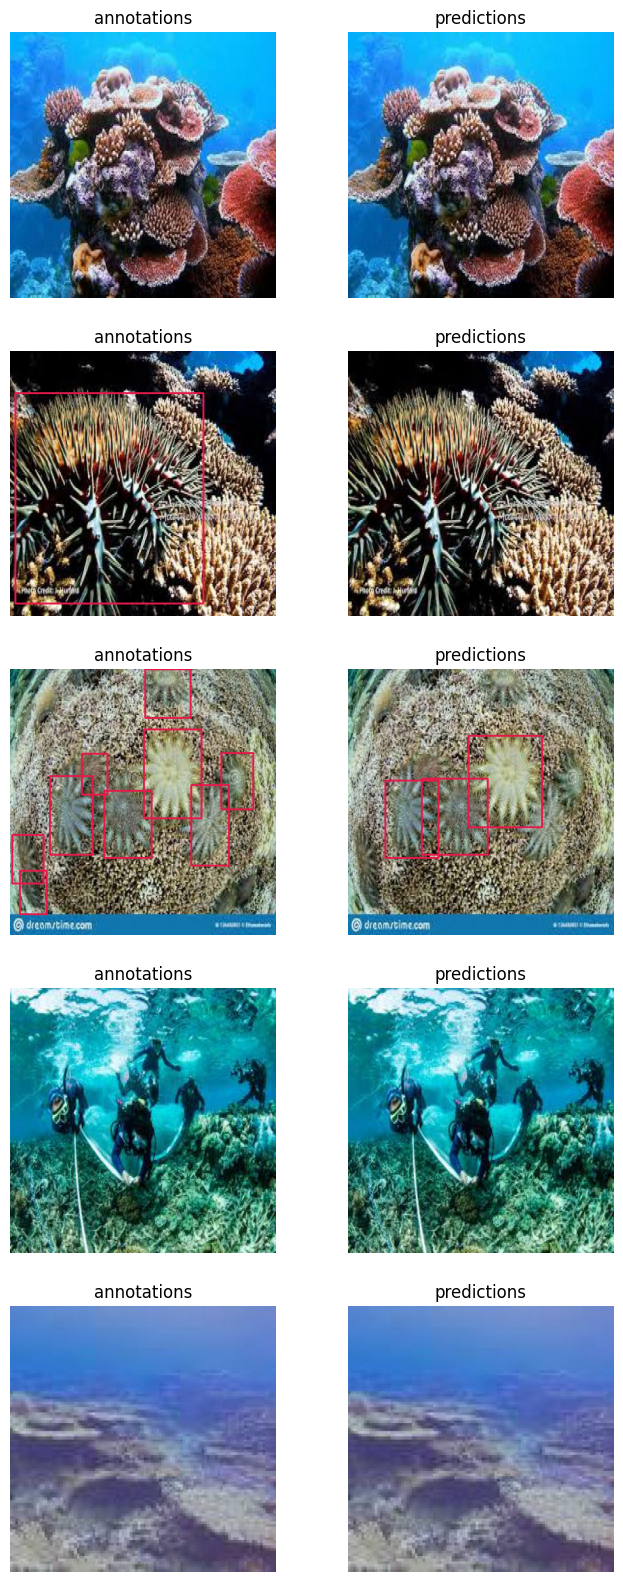

In [20]:
import random
random.seed(10)

import supervision as sv

MAX_IMAGE_COUNT = 5

n = min(MAX_IMAGE_COUNT, len(ds.images))

keys = list(ds.images.keys())
keys = random.sample(keys, n)

box_annotator = sv.BoxAnnotator()

images = []
titles = []

for key in keys:
    frame_with_annotations = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=ds.annotations[key],
        skip_label=True
    )
    images.append(frame_with_annotations)
    titles.append('annotations')
    frame_with_predictions = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=predictions[key],
        skip_label=True
    )
    images.append(frame_with_predictions)
    titles.append('predictions')

%matplotlib inline
sv.plot_images_grid(images=images, titles=titles, grid_size=(n, 2), size=(2 * 4, n * 4))

### Confusion matrix

In [21]:
!pip install onemetric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.5 MB/s eta 0:00:00


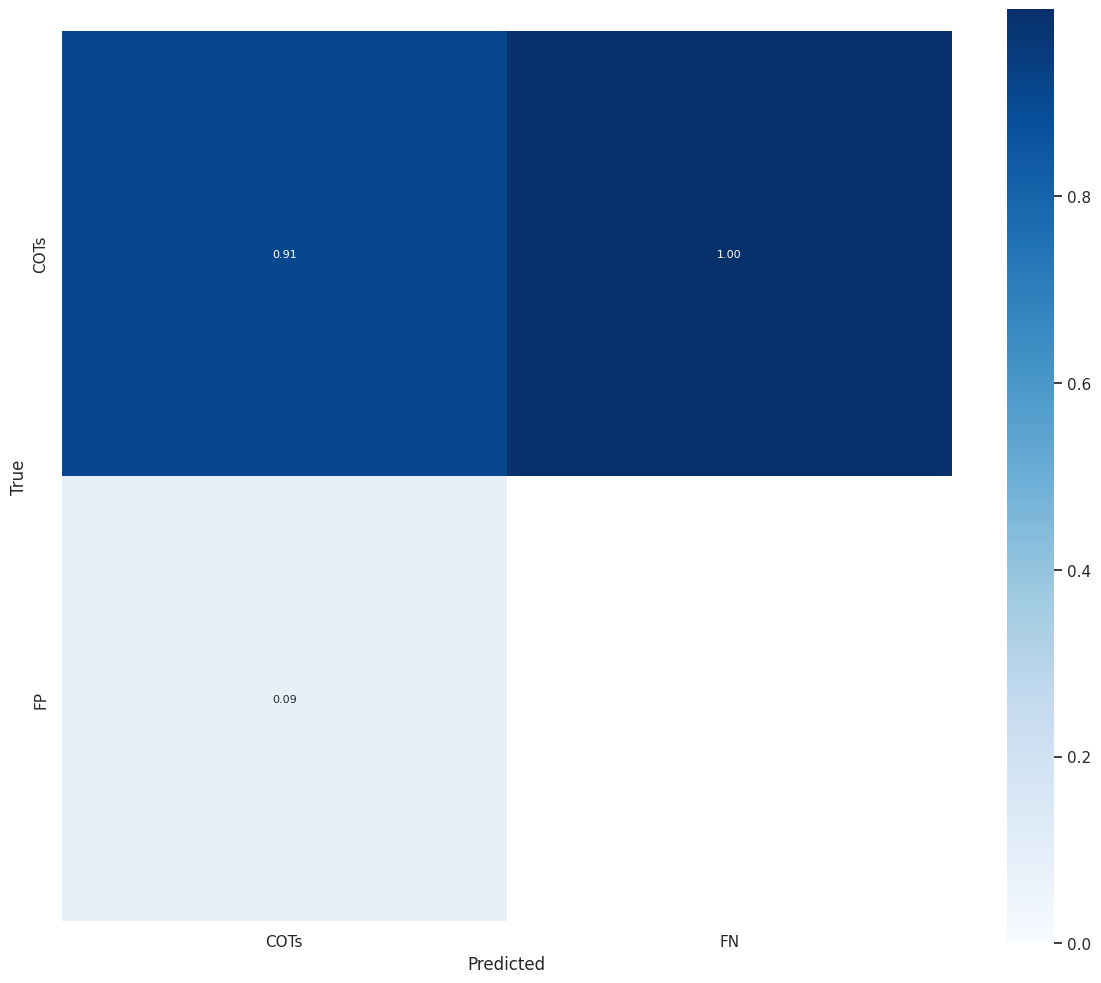

In [22]:
import os

import numpy as np

from onemetric.cv.object_detection import ConfusionMatrix

keys = list(ds.images.keys())

annotation_batches, prediction_batches = [], []

for key in keys:
    annotation=ds.annotations[key]
    annotation_batch = np.column_stack((
        annotation.xyxy,
        annotation.class_id
    ))
    annotation_batches.append(annotation_batch)

    prediction=predictions[key]
    prediction_batch = np.column_stack((
        prediction.xyxy,
        prediction.class_id,
        prediction.confidence
    ))
    prediction_batches.append(prediction_batch)

confusion_matrix = ConfusionMatrix.from_detections(
    true_batches=annotation_batches,
    detection_batches=prediction_batches,
    num_classes=len(ds.classes),
    conf_threshold=CONFIDENCE_TRESHOLD
)

confusion_matrix.plot(os.path.join(HOME, "confusion_matrix.png"), class_names=ds.classes)